In [1]:
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np
%matplotlib inline

In [92]:
import pathlib
from dedalus.tools import post
set_paths = list(pathlib.Path("/Users/claudiopierard/Dropbox/ugm_sim/ugm_28/").glob("ugm_28_s*.h5"))
post.merge_sets("/Users/claudiopierard/Dropbox/ugm_sim/ugm_28/ugm_28.h5", set_paths, cleanup=True)

In [93]:
file_ugm_28 = '/Users/claudiopierard/Dropbox/ugm_sim/ugm_28/ugm_28.h5'

In [8]:
dx, dy = 0.1/256., 0.15/256.

x, y = np.mgrid[slice(0, 0.1, dx), slice(0, 0.15, dy)]

In [94]:
with h5.File(file_ugm_28, mode='r') as file:
    T = file['tasks']['T']
    ρ = file['tasks']['ρ']
    s = file['tasks']['s']
    v = file['tasks']['v']
    t = file['scales']['sim_time']
    ρ_p = file['tasks']['ρ profile']
    s_p = file['tasks']['s profile']
    T_p = file['tasks']['T profile']
    xp = file['scales']['x']
    yp = file['scales']['y']

(1200, 1, 256)


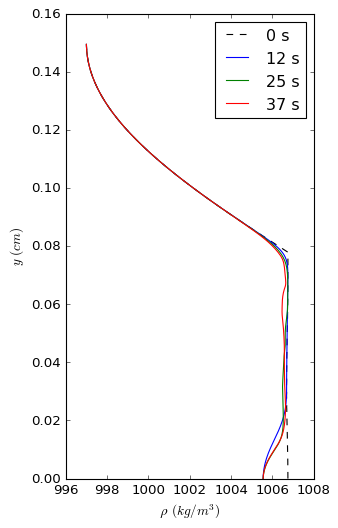

In [96]:
with h5.File(file_ugm_28, mode='r') as file:
    
    t = file['scales']['sim_time']
    ρ_p = file['tasks']['ρ profile']
    print(ρ_p.shape)
    plt.figure(figsize=(4,7.5))
    plt.plot(ρ_p[0, 0,:], y[0], '--k', label = '0 s')
    for i in [50, 100, 150]:
        plt.plot(ρ_p[i, 0,:], y[0], label = str(t[i])[:2]+ ' s')
    plt.legend()
    plt.xlabel('$ρ \ (kg/m^3)$')
    plt.ylabel('$y \ (cm)$')
    plt.rcParams.update({'font.size': 12})

(1200, 256, 256)


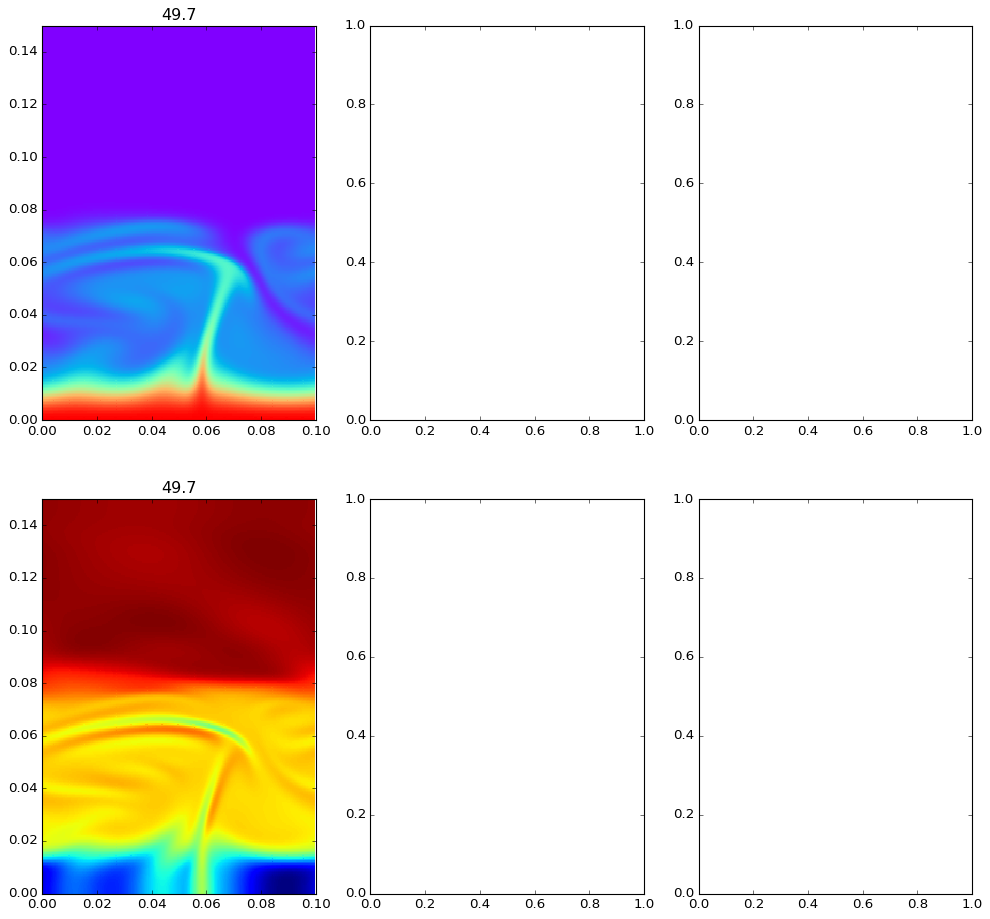

In [106]:
with h5.File(file_ugm_28, mode='r') as file:
    T = file['tasks']['T']
    t = file['scales']['sim_time']
    NN = fileT = file['tasks']['NN']
    print(T.shape)
    #plt.figure(figsize=(6,7.5))
    
    plt.figure(figsize=(15,14))
    ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
    plt.ylim(0,0.15)
    plt.title(str(t[199])[:4])
    ax1.pcolormesh(x,y, T[199, :,:], cmap= 'rainbow')
    
    ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
    plt.ylim(0,0.15)
    plt.title(str(t[199])[:4])
    ax2.pcolormesh(x,y, NN[199, :,:], cmap= 'jet')
    
    ax3 = plt.subplot2grid((2, 3), (0, 1), rowspan=1)
    ax4 = plt.subplot2grid((2, 3), (1, 1))
    ax5 = plt.subplot2grid((2, 3), (0, 2))
    ax6 = plt.subplot2grid((2, 3), (1, 2))

In [73]:
import matplotlib.gridspec as gridspec

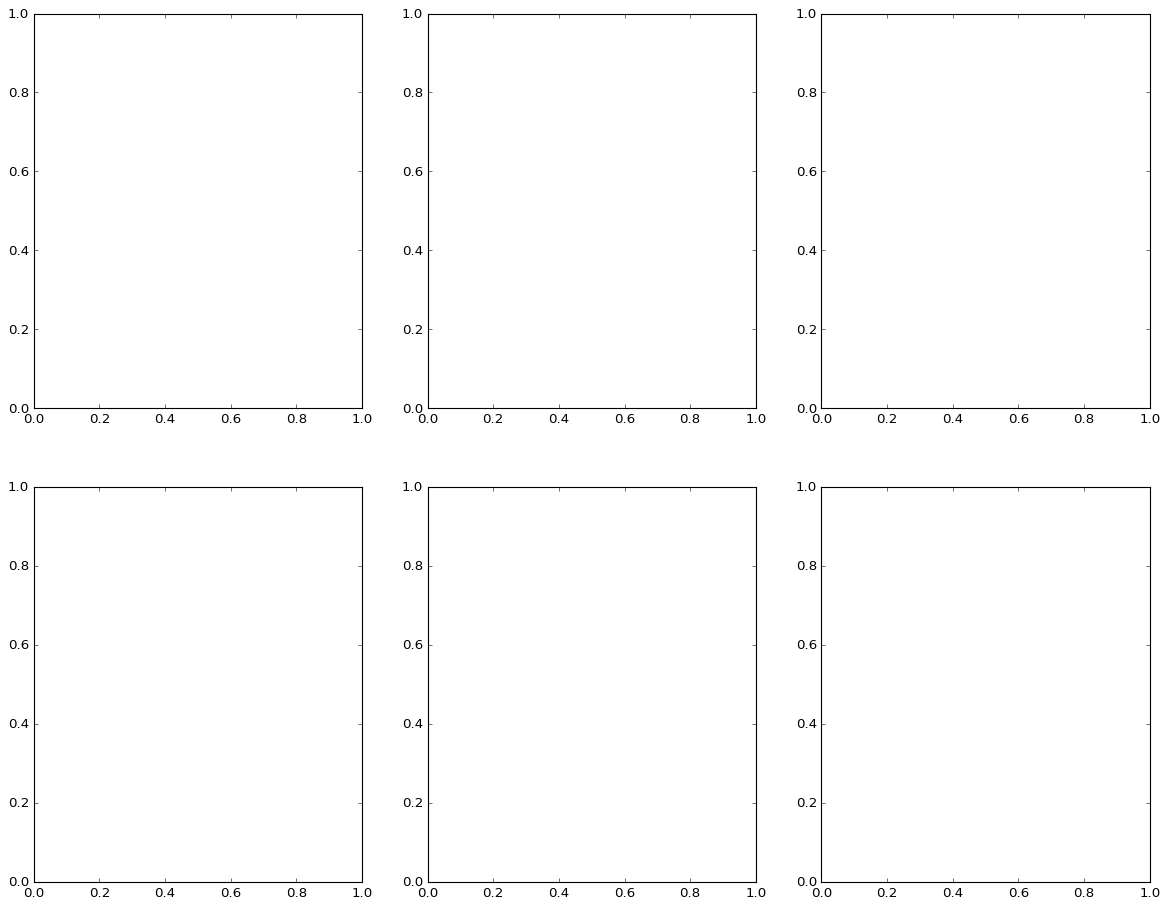

In [83]:
plt.figure(figsize=(18,14))
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)

ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 3), (0, 1), rowspan=1)
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax5 = plt.subplot2grid((2, 3), (0, 2))
ax6 = plt.subplot2grid((2, 3), (1, 2))

(1200, 256, 256)


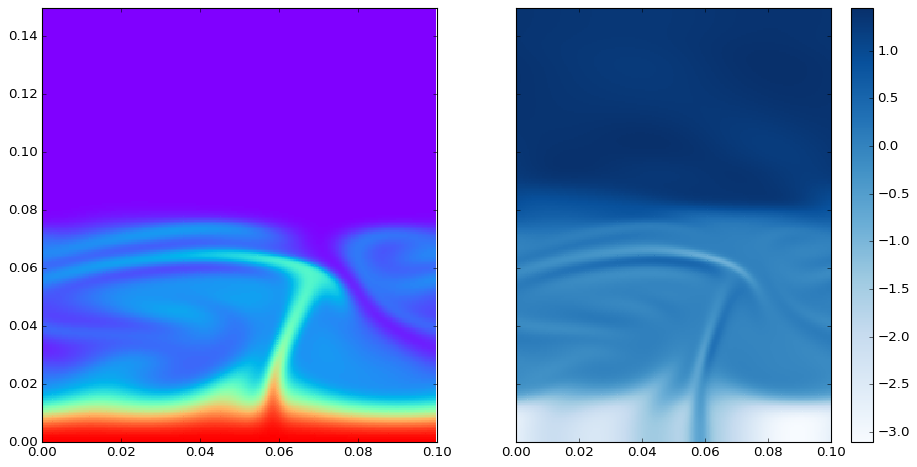

In [164]:
with h5.File(file_ugm_28, mode='r') as file:
    T = file['tasks']['T']
    t = file['scales']['sim_time']
    NN = fileT = file['tasks']['NN']
    print(T.shape)
    #plt.figure(figsize=(6,7.5))
    
    fig, axes = plt.subplots(1, 2, sharey = True)
    fig.set_size_inches(14,7)
    a1 = axes[0].pcolormesh(x,y, T[199,:,:], cmap= 'rainbow')
    axes.flat[0].set_ylim(0, 0.15)
    axes.flat[0]
    a2 = axes[1].pcolormesh(x,y, NN[199,:,:], cmap='Blues')
    fig.colorbar(a2)

# Stackoverflow Q

In [172]:
1200/50

24.0

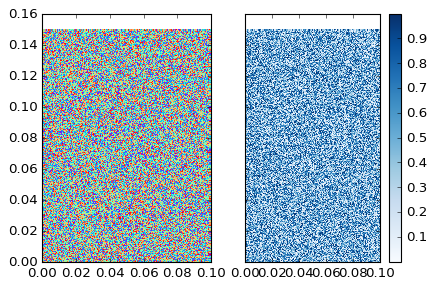

In [170]:
dx, dy = 0.1/256., 0.15/256.

x, y = np.mgrid[slice(0, 0.1, dx), slice(0, 0.15, dy)]

dat1 = np.random.random(x.shape)
dat2 = np.random.random(x.shape)

fig, axes = plt.subplots(1, 2, sharey = True)
a1 = axes[0].pcolormesh(x,y, dat1, cmap= 'rainbow')
#axes.flat[0].set_ylim(0, 0.15)
axes.flat[0]
a2 = axes[1].pcolormesh(x,y, dat2, cmap='Blues')
fig.colorbar(a2)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

enter image description here